# Wrangling flow data

While it is convenient to use a package such as `cytofkit`, sometimes you need to further manipulate your data or experiement with a new clustering or visualization algorithm. In order to do so, it is necessary to know how to manuplate data "from first principles" using modern R syntax.

## Load FCS file into FlowFrame 

While you can load FCS files into a FlowFrame using `flowCore`, it is quite strcit in data validatioan and might not work with processed FCS files. I find it easier to just use a regular data frame and manipullate it using `dplyr` and friends.

The [package description](https://www.bioconductor.org/packages/devel/bioc/vignettes/flowCore/inst/doc/HowTo-flowCore.pdf) for `flowCore` is quite old, and installation can be tricky, so we will just show a small example for completeness.

In [1]:
library(flowCore)
library(flowViz)
library(viridis)
library(feather)
library(ggcyto)
library(tidyverse)

Loading required package: lattice

Loading required package: viridisLite

Loading required package: ggplot2

Loading required package: ncdfFlow

Loading required package: RcppArmadillo

Loading required package: BH

Loading required package: flowWorkspace

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
✔ purrr   0.3.3     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggcyto::%+%()   masks ggplot2::%+%()
✖ dplyr::filter() masks ncdfFlow::filter(), flowCore::filter(), stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
path <- "../data/AMJ_5L_Costim.fcs"
f <- read.FCS(path, transformation=TRUE)
summary(f) 

FSC-A     FSC-H     FSC-W     SSC-A     SSC-H     SSC-W     Blue B-A  
Min.      8115.32  10016.00  52941.04    -58.50     39.00      0.00   -224.640
1st Qu.  85423.84  68520.75  75363.05  32323.59  28755.00  72096.97    159.120
Median  106674.00  88258.50  78374.04  45341.01  39318.00  73540.32    417.690
Mean    116164.27  93255.43  81488.47  73201.61  58258.84  79145.92   2811.148
3rd Qu. 134093.69 111986.25  82921.75  76215.55  60272.00  77890.96    730.080
Max.    262143.00 262062.00 262143.00 262143.00 256047.00 262143.00 262143.000
        Blue A-A    Violet H-A  Violet G-A Red C-A     Red B-A     Red A-A   
Min.      -190.7100   -131.1000   -137.750   -251.4500   -124.1200   -281.410
1st Qu.    177.8400     57.9500    811.300     93.0900    120.9100    140.170
Median     902.0699    100.7000   1709.050    467.5900    449.4000    380.920
Mean      1660.0286    267.6635   2128.399    722.0453    642.4512   1457.254
3rd Qu.   2504.9700    269.8000   2610.600   1052.8800    841.0200   1295.770
Max.    262143.0000 243319.7031 262143.000 262143.0000 262143.0000 262143.000
        Green E-A   Green D-A  Green C-A  Green A-A   Time    
Min.      -223.4800    -91.020   -237.540    -88.0600     0.50
1st Qu.     70.3000    140.600    555.000    216.0800  8495.50
Median     189.4400    722.980   1206.200    399.6000 16776.65
Mean       316.5595   2559.036   2544.147    601.0417 17038.89
3rd Qu.    408.4800   3965.660   2456.060    663.7800 25170.40
Max.    262143.0000 262143.000 262143.000 262143.0000 35854.20

### Inspect data set

In [3]:
class(f)

[1] "flowFrame"
attr(,"package")
[1] "flowCore"

In [4]:
structure(f)

flowFrame object '0aef5288-b756-45cc-ac37-9a1f345cb92e'
with 455472 cells and 18 observables:
           name             desc  range minRange maxRange
$P1       FSC-A             <NA> 262144     0.00   262143
$P2       FSC-H             <NA> 262144     0.00   262143
$P3       FSC-W             <NA> 262144     0.00   262143
$P4       SSC-A             <NA> 262144   -58.50   262143
$P5       SSC-H             <NA> 262144     0.00   262143
$P6       SSC-W             <NA> 262144     0.00   262143
$P7    Blue B-A        CD57 FITC 262144  -111.00   262143
$P8    Blue A-A   CD4 PerCP Cy55 262144  -111.00   262143
$P9  Violet H-A CD14 CD19 vAmine 262144  -111.00   262143
$P10 Violet G-A       CD3 AmCyan 262144  -111.00   262143
$P11    Red C-A         CD27 APC 262144  -111.00   262143
$P12    Red B-A        TNFa A700 262144  -111.00   262143
$P13    Red A-A      CD8 APC Cy7 262144  -111.00   262143
$P14  Green E-A          IL 2 PE 262144  -111.00   262143
$P15  Green D-A       CD45RO ECD 262

In [5]:
names(f)

[1] "<FSC-A> FSC-A"           "<FSC-H> FSC-H"          
 [3] "<FSC-W> FSC-W"           "<SSC-A> SSC-A"          
 [5] "<SSC-H> SSC-H"           "<SSC-W> SSC-W"          
 [7] "<Blue B-A> Blue B-A"     "<Blue A-A> Blue A-A"    
 [9] "<Violet H-A> Violet H-A" "<Violet G-A> Violet G-A"
[11] "<Red C-A> Red C-A"       "<Red B-A> Red B-A"      
[13] "<Red A-A> Red A-A"       "<Green E-A> Green E-A"  
[15] "<Green D-A> Green D-A"   "<Green C-A> Green C-A"  
[17] "<Green A-A> Green A-A"   "<Time> Time"

In [6]:
dim(f)

events parameters 
    455472         18

In [7]:
f %>% head(3)

FSC-A     FSC-H  FSC-W     SSC-A     SSC-H  SSC-W    Blue B-A Blue A-A
[1,] 115287.04 101852  74180.69  34462.35  30347 74423.32  665.730 2840.76 
[2,]  82415.45  47466 113790.48 157266.72 122654 84030.13  204.750  779.22 
[3,] 155133.16 134617  75523.94  51181.65  45901 73075.55 9809.279  239.85 
     Violet H-A Violet G-A Red C-A Red B-A Red A-A Green E-A Green D-A
[1,] 113.05     2809.15    1110.66 977.98   136.96  83.62     399.60  
[2,] 508.25     1678.65      92.02 223.63   340.26 611.98    4781.88  
[3,]  46.55     1671.05     208.65 191.53  2914.68 335.22    1987.64  
     Green C-A Green A-A Time
[1,] 1509.60   395.90    0.5 
[2,] 3086.54   667.48    0.6 
[3,]  930.92   523.18    0.8

In [8]:
f %>% tail(3)

FSC-A     FSC-H  FSC-W     SSC-A     SSC-H  SSC-W     Blue B-A
[455470,] 258406.84 166605 101647.32  80879.76  40169 131955.89 843.5699
[455471,]  80360.16  56671  92930.84 186648.92 145391  84133.30  32.7600
[455472,] 262143.00 262051  65559.01 244664.55 183411  87422.98 362.7000
          Blue A-A Violet H-A Violet G-A Red C-A Red B-A Red A-A  Green E-A
[455470,] 4768.92   122.55    3172.05    1208.03 1305.40 927.6901 637.88   
[455471,] 1540.89  1013.65    1482.00     310.30  361.66 116.6300 481.74   
[455472,] 1622.79   679.25    1565.60     421.58  594.92 243.9600 546.12   
          Green D-A Green C-A Green A-A Time   
[455470,] 9297.36   3816.92   924.26    35854.2
[455471,] 3941.98   5518.18   586.08    35854.2
[455472,] 1993.56   5602.54   727.42    35854.2

## Compensate from embedded spillover matrix

In [9]:
comp <- spillover(f)[[1]]

In [10]:
fc <- compensate(f, comp)

## Transform

In [11]:
lgcl <- estimateLogicle(fc, channels = c(
    'Blue B-A',
    'Blue A-A',
    'Violet H-A',
    'Violet G-A',
    'Red C-A',
    'Red B-A',
    'Red A-A',
    'Green E-A',
    'Green D-A',
    'Green C-A',
    'Green A-A'
    ))

In [12]:
ft <- transform(fc, lgcl)

## Use more memorable names

In [13]:
colnames(ft)

[1] "FSC-A"      "FSC-H"      "FSC-W"      "SSC-A"      "SSC-H"     
 [6] "SSC-W"      "Blue B-A"   "Blue A-A"   "Violet H-A" "Violet G-A"
[11] "Red C-A"    "Red B-A"    "Red A-A"    "Green E-A"  "Green D-A" 
[16] "Green C-A"  "Green A-A"  "Time"

In [14]:
ft@parameters@data

name       desc             range  minRange     maxRange
$P1  FSC-A      NA               262144   0.00000000 262143.0
$P2  FSC-H      NA               262144   0.00000000 262143.0
$P3  FSC-W      NA               262144   0.00000000 262143.0
$P4  SSC-A      NA               262144 -58.49999619 262143.0
$P5  SSC-H      NA               262144   0.00000000 262143.0
$P6  SSC-W      NA               262144   0.00000000 262143.0
$P7  Blue B-A   CD57 FITC        262144   0.02224673      4.5
$P8  Blue A-A   CD4 PerCP Cy55   262144   0.84871278      4.5
$P9  Violet H-A CD14 CD19 vAmine 262144  -0.33722914      4.5
$P10 Violet G-A CD3 AmCyan       262144   0.28409393      4.5
$P11 Red C-A    CD27 APC         262144   0.45103358      4.5
$P12 Red B-A    TNFa A700        262144   0.28058887      4.5
$P13 Red A-A    CD8 APC Cy7      262144   0.53279708      4.5
$P14 Green E-A  IL 2 PE          262144  -0.25858203      4.5
$P15 Green D-A  CD45RO ECD       262144  -0.10320844      4.5
$P16 Green C-A  CD107 PE Cy5     262144   0.34850308      4.5
$P17 Green A-A  IFNg PE Cy7      262144   0.13753212      4.5
$P18 Time       NA               262144   0.00000000 262143.0

In [15]:
ft@parameters@data %>%
transmute(desc = coalesce(desc, name)) %>% 
unlist -> desc

In [16]:
colnames(ft) <- desc

In [17]:
ft %>% head

FSC-A     FSC-H  FSC-W     SSC-A     SSC-H  SSC-W    CD57 FITC
[1,] 115287.04 101852  74180.69  34462.35  30347 74423.32 1.1491805
[2,]  82415.45  47466 113790.48 157266.72 122654 84030.13 0.5391563
[3,] 155133.16 134617  75523.94  51181.65  45901 73075.55 3.0580336
[4,] 152719.08 135402  73917.66  43094.61  37658 74997.30 0.9553529
[5,]  92583.28  75986  79850.75  50107.59  42614 77060.38 1.0518067
[6,]  99808.96  88879  73595.34  30540.51  27115 73815.34 0.8912446
     CD4 PerCP Cy55 CD14 CD19 vAmine CD3 AmCyan CD27 APC  TNFa A700 CD8 APC Cy7
[1,] 2.3797706      0.7282037        2.491189   1.9974476 0.8080159 0.1914272  
[2,] 0.6943536      1.7322930        2.044130   0.4462705 1.0384756 1.1811191  
[3,] 0.8320347      0.4894984        2.123281   0.9544763 0.8953970 2.4861646  
[4,] 2.2686988      0.6370433        2.311536   1.9367172 1.2425233 0.7207330  
[5,] 1.0431089      0.7380153        2.316243   2.2498796 0.1385154 2.6400260  
[6,] 2.3206380      0.7434830        2.453467   1.9713599 0.7345063 0.8987407  
     IL 2 PE   CD45RO ECD CD107 PE Cy5 IFNg PE Cy7 Time
[1,] 0.7260525 1.5602081  1.716678     0.9965204   0.5 
[2,] 1.5106920 2.7279889  2.311868     1.6077531   0.6 
[3,] 1.1964361 2.3239705  1.486137     0.8642516   0.8 
[4,] 0.9111663 1.8523352  1.259306     1.2048772   1.1 
[5,] 0.7472309 1.1688017  1.491966     0.5397698   1.1 
[6,] 0.5575568 0.6326826  1.476909     1.1162281   1.2

In [18]:
colnames(ft)

[1] "FSC-A"            "FSC-H"            "FSC-W"            "SSC-A"           
 [5] "SSC-H"            "SSC-W"            "CD57 FITC"        "CD4 PerCP Cy55"  
 [9] "CD14 CD19 vAmine" "CD3 AmCyan"       "CD27 APC"         "TNFa A700"       
[13] "CD8 APC Cy7"      "IL 2 PE"          "CD45RO ECD"       "CD107 PE Cy5"    
[17] "IFNg PE Cy7"      "Time"

In [19]:
options(repr.plot.width = 4, repr.plot.height = 4)

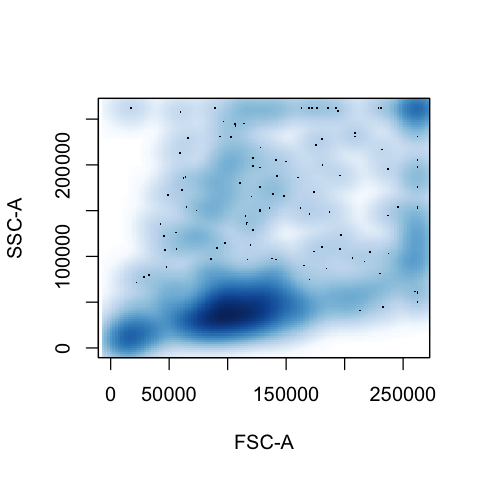

In [20]:
plot(ft[1:1000, c(1,4)])

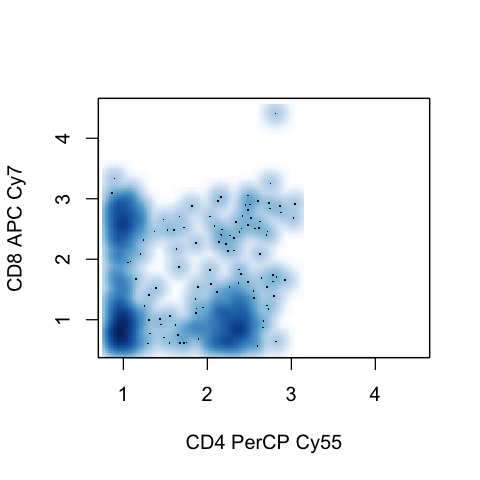

In [21]:
plot(ft[1:1000, c('CD4 PerCP Cy55', 'CD8 APC Cy7')])

## Convert to standard tibble/data.frame

In [22]:
df <- as_tibble(ft@exprs)

In [23]:
df %>% sample_n(3)

FSC-A    FSC-H  FSC-W    SSC-A     SSC-H  SSC-W    CD57 FITC CD4 PerCP Cy55
1 134268.5 113816 77312.69 243438.38 197740 80681.59 0.8785422 0.06083328    
2 112965.9  98486 75171.41  64598.04  57334 73839.21 3.6218304 0.99538820    
3 127827.6 109203 76713.16  40031.55  36471 71934.07 0.8705780 0.74169335    
  CD14 CD19 vAmine CD3 AmCyan CD27 APC  TNFa A700 CD8 APC Cy7 IL 2 PE  
1 1.1983107        1.695055   0.2128137 0.5404357 0.1855549   1.1135243
2 0.6027077        2.127861   0.9281177 0.4313565 2.9424336   1.2940950
3 0.5381670        2.223150   1.4452220 0.5111287 1.6848384   0.4504841
  CD45RO ECD CD107 PE Cy5 IFNg PE Cy7 Time   
1 1.522729   3.484207     1.6703751    1698.8
2 2.770148   1.037904     0.9232880    9716.8
3 2.959067   1.188482     0.5722659   30111.0

#### Piping

In [24]:
df %>% select(`CD57 FITC`:`IFNg PE Cy7`) %>% head(10) %>% tail(3)

CD57 FITC CD4 PerCP Cy55 CD14 CD19 vAmine CD3 AmCyan CD27 APC  TNFa A700
1 0.3585420 2.5460019      0.5181778        2.5823025  2.2804482 0.1655836
2 0.7675631 0.8757346      0.6058707        0.6250413  0.5617792 0.6825087
3 1.0958242 2.2933015      0.6049002        2.5033845  1.7995308 0.5384919
  CD8 APC Cy7 IL 2 PE   CD45RO ECD CD107 PE Cy5 IFNg PE Cy7
1 0.7521528   0.5088820 1.479649   1.846076     0.7275086  
2 0.6823550   0.4864510 0.831718   1.279902     0.7772467  
3 0.9760071   0.4605802 2.900461   1.570953     0.4351659

#### Can split over several lines for readbility

In [25]:
df %>% 
select(`CD57 FITC`:`IFNg PE Cy7`) %>% 
head(10) %>% 
tail(3)

CD57 FITC CD4 PerCP Cy55 CD14 CD19 vAmine CD3 AmCyan CD27 APC  TNFa A700
1 0.3585420 2.5460019      0.5181778        2.5823025  2.2804482 0.1655836
2 0.7675631 0.8757346      0.6058707        0.6250413  0.5617792 0.6825087
3 1.0958242 2.2933015      0.6049002        2.5033845  1.7995308 0.5384919
  CD8 APC Cy7 IL 2 PE   CD45RO ECD CD107 PE Cy5 IFNg PE Cy7
1 0.7521528   0.5088820 1.479649   1.846076     0.7275086  
2 0.6823550   0.4864510 0.831718   1.279902     0.7772467  
3 0.9760071   0.4605802 2.900461   1.570953     0.4351659

#### To save piped output, re-assign to new variable

In [26]:
df %>% 
select(`CD57 FITC`:`IFNg PE Cy7`) -> x

In [27]:
x %>% head

CD57 FITC CD4 PerCP Cy55 CD14 CD19 vAmine CD3 AmCyan CD27 APC  TNFa A700
1 1.1491805 2.3797706      0.7282037        2.491189   1.9974476 0.8080159
2 0.5391563 0.6943536      1.7322930        2.044130   0.4462705 1.0384756
3 3.0580336 0.8320347      0.4894984        2.123281   0.9544763 0.8953970
4 0.9553529 2.2686988      0.6370433        2.311536   1.9367172 1.2425233
5 1.0518067 1.0431089      0.7380153        2.316243   2.2498796 0.1385154
6 0.8912446 2.3206380      0.7434830        2.453467   1.9713599 0.7345063
  CD8 APC Cy7 IL 2 PE   CD45RO ECD CD107 PE Cy5 IFNg PE Cy7
1 0.1914272   0.7260525 1.5602081  1.716678     0.9965204  
2 1.1811191   1.5106920 2.7279889  2.311868     1.6077531  
3 2.4861646   1.1964361 2.3239705  1.486137     0.8642516  
4 0.7207330   0.9111663 1.8523352  1.259306     1.2048772  
5 2.6400260   0.7472309 1.1688017  1.491966     0.5397698  
6 0.8987407   0.5575568 0.6326826  1.476909     1.1162281

#### Subsetting data

In [28]:
df[1:3, c(3,4,6)]

FSC-W     SSC-A     SSC-W   
1  74180.69  34462.35 74423.32
2 113790.48 157266.72 84030.13
3  75523.94  51181.65 73075.55

#### Selecting columns

In [29]:
df %>% 
select(c(`CD4 PerCP Cy55`, `CD8 APC Cy7`)) %>% 
head(3)

CD4 PerCP Cy55 CD8 APC Cy7
1 2.3797706      0.1914272  
2 0.6943536      1.1811191  
3 0.8320347      2.4861646

In [30]:
df %>% 
select(starts_with('CD4')) %>% 
head(3)

CD4 PerCP Cy55 CD45RO ECD
1 2.3797706      1.560208  
2 0.6943536      2.727989  
3 0.8320347      2.323970

In [31]:
df %>% 
select(contains('SC')) %>%
head(3)

FSC-A     FSC-H  FSC-W     SSC-A     SSC-H  SSC-W   
1 115287.04 101852  74180.69  34462.35  30347 74423.32
2  82415.45  47466 113790.48 157266.72 122654 84030.13
3 155133.16 134617  75523.94  51181.65  45901 73075.55

#### Filtering rows

In [32]:
dim(df)

[1] 455472     18

In [33]:
colnames(df)

[1] "FSC-A"            "FSC-H"            "FSC-W"            "SSC-A"           
 [5] "SSC-H"            "SSC-W"            "CD57 FITC"        "CD4 PerCP Cy55"  
 [9] "CD14 CD19 vAmine" "CD3 AmCyan"       "CD27 APC"         "TNFa A700"       
[13] "CD8 APC Cy7"      "IL 2 PE"          "CD45RO ECD"       "CD107 PE Cy5"    
[17] "IFNg PE Cy7"      "Time"

In [34]:
df %>% 
select(-contains('SC')) %>% 
filter(`CD3 AmCyan` > quantile(`CD3 AmCyan`, 0.1)) %>% 
head(3)

CD57 FITC CD4 PerCP Cy55 CD14 CD19 vAmine CD3 AmCyan CD27 APC  TNFa A700
1 1.1491805 2.3797706      0.7282037        2.491189   1.9974476 0.8080159
2 0.5391563 0.6943536      1.7322930        2.044130   0.4462705 1.0384756
3 3.0580336 0.8320347      0.4894984        2.123281   0.9544763 0.8953970
  CD8 APC Cy7 IL 2 PE   CD45RO ECD CD107 PE Cy5 IFNg PE Cy7 Time
1 0.1914272   0.7260525 1.560208   1.716678     0.9965204   0.5 
2 1.1811191   1.5106920 2.727989   2.311868     1.6077531   0.6 
3 2.4861646   1.1964361 2.323970   1.486137     0.8642516   0.8

#### Mutating data

`mutate` returns original and transformed columns

In [35]:
df %>% 
select(contains('SC')) %>% 
mutate(FSC_A_sc = scale(`FSC-A`),
       SSC_A_sc = scale(`SSC-A`)) %>%
head(3)

FSC-A     FSC-H  FSC-W     SSC-A     SSC-H  SSC-W    FSC_A_sc    SSC_A_sc  
1 115287.04 101852  74180.69  34462.35  30347 74423.32 -0.01490975 -0.5755467
2  82415.45  47466 113790.48 157266.72 122654 84030.13 -0.57360466  1.2489500
3 155133.16 134617  75523.94  51181.65  45901 73075.55  0.66232614 -0.3271491

`transmute` only returns transformed columns

In [36]:
df %>% 
transmute(FSC_A_sc = scale(`FSC-A`),
          SSC_A_sc = scale(`SSC-A`)) %>%
head(3)

FSC_A_sc    SSC_A_sc  
1 -0.01490975 -0.5755467
2 -0.57360466  1.2489500
3  0.66232614 -0.3271491

#### Summarizing data

In [37]:
df %>%
summarize(median=median(`CD3 AmCyan`), q50=quantile(`CD3 AmCyan`, 0.5))

median   q50     
1 2.175634 2.175634

In [38]:
df %>%
summarize_all(median)

FSC-A  FSC-H   FSC-W    SSC-A    SSC-H SSC-W    CD57 FITC CD4 PerCP Cy55
1 106674 88258.5 78374.04 45341.01 39318 73540.32 0.9827989 1.062252      
  CD14 CD19 vAmine CD3 AmCyan CD27 APC TNFa A700 CD8 APC Cy7 IL 2 PE  
1 0.7632813        2.175634   1.103051 0.7615374 0.98935     0.8571454
  CD45RO ECD CD107 PE Cy5 IFNg PE Cy7 Time    
1 1.783075   1.297293     0.9764162   16776.65

In [39]:
df %>%
summarize_if(is.numeric, median)

FSC-A  FSC-H   FSC-W    SSC-A    SSC-H SSC-W    CD57 FITC CD4 PerCP Cy55
1 106674 88258.5 78374.04 45341.01 39318 73540.32 0.9827989 1.062252      
  CD14 CD19 vAmine CD3 AmCyan CD27 APC TNFa A700 CD8 APC Cy7 IL 2 PE  
1 0.7632813        2.175634   1.103051 0.7615374 0.98935     0.8571454
  CD45RO ECD CD107 PE Cy5 IFNg PE Cy7 Time    
1 1.783075   1.297293     0.9764162   16776.65

In [40]:
df %>%
select(starts_with('CD4')) %>% 
summarize_all(list(min=min, max=max))

CD4 PerCP Cy55_min CD45RO ECD_min CD4 PerCP Cy55_max CD45RO ECD_max
1 -1.68317           -0.4004647     4.401902           4.466013

## Subsetting data

Suppose we clustered the data and had labels for each cluster

In [41]:
cluster <- sample(1:10, size = nrow(df), replace = TRUE)

In [42]:
df %>% mutate(cluster=cluster) -> df

In [43]:
df %>% 
select(c(cluster, starts_with('CD4'))) %>% 
head()

cluster CD4 PerCP Cy55 CD45RO ECD
1 10      2.3797706      1.5602081 
2  7      0.6943536      2.7279889 
3  7      0.8320347      2.3239705 
4  7      2.2686988      1.8523352 
5  6      1.0431089      1.1688017 
6  4      2.3206380      0.6326826

In [44]:
df %>% 
group_by(cluster) %>% 
select(c(cluster, starts_with('CD4'))) %>% 
summarize_all(mean)

cluster CD4 PerCP Cy55 CD45RO ECD
1   1      1.449856       1.766587  
2   2      1.445108       1.759022  
3   3      1.453181       1.761591  
4   4      1.455319       1.760320  
5   5      1.448666       1.764636  
6   6      1.450830       1.767116  
7   7      1.447911       1.765129  
8   8      1.451307       1.771997  
9   9      1.448459       1.768161  
10 10      1.448895       1.763039

### Simple visualizationm

In [45]:
n <- 10000
df %>% 
sample_n(n, replace = FALSE) %>%
select(contains('SC')) -> sc

In [46]:
sc %>% head(n=3)

FSC-A    FSC-H  FSC-W    SSC-A     SSC-H  SSC-W    
1 113519.7  91682 81146.01  40679.73  36834  72378.42
2 199693.4 137918 94890.48 247507.64 146266 110898.37
3 103844.1  82858 82134.80  48675.51  43898  72668.41

In [47]:
options(repr.plot.width = 4, repr.plot.height = 4)

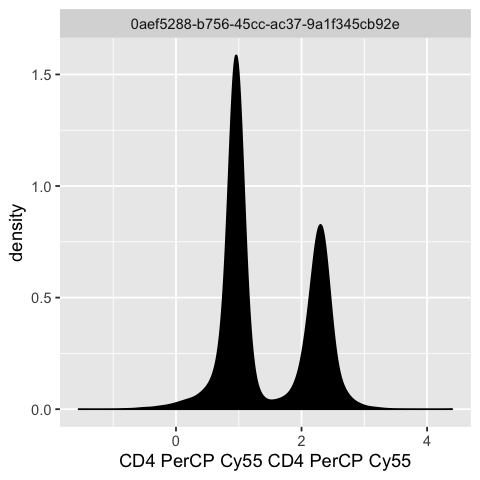

In [48]:
autoplot(ft, "CD4 PerCP Cy55")

In [49]:
autoplot(ft, "CD4 PerCP Cy55", "CD8 APC Cy7")

## Working with multiple files

In [50]:
file_names <- list.files('../data', pattern='*fcs', full.names=TRUE)
file_names

[1] "../data/AMJ_5L_CMV pp65.fcs" "../data/AMJ_5L_Costim.fcs"  
[3] "../data/AMJ_5L_SEB.fcs"

In [51]:
fs <- read.flowSet(files=file_names)

### Extracting individual flow frames

In [52]:
f1 <- fs[[1]]
f1

flowFrame object 'AMJ_5L_CMV pp65.fcs'
with 411894 cells and 18 observables:
           name             desc  range minRange maxRange
$P1       FSC-A             <NA> 262144     -111   262143
$P2       FSC-H             <NA> 262144        0   262143
$P3       FSC-W             <NA> 262144        0   262143
$P4       SSC-A             <NA> 262144     -111   262143
$P5       SSC-H             <NA> 262144        0   262143
$P6       SSC-W             <NA> 262144        0   262143
$P7    Blue B-A        CD57 FITC 262144     -111   262143
$P8    Blue A-A   CD4 PerCP Cy55 262144     -111   262143
$P9  Violet H-A CD14 CD19 vAmine 262144     -111   262143
$P10 Violet G-A       CD3 AmCyan 262144     -111   262143
$P11    Red C-A         CD27 APC 262144     -111   262143
$P12    Red B-A        TNFa A700 262144     -111   262143
$P13    Red A-A      CD8 APC Cy7 262144     -111   262143
$P14  Green E-A          IL 2 PE 262144     -111   262143
$P15  Green D-A       CD45RO ECD 262144     -111   26

In [53]:
fsc <- fsApply(fs, function(x) compensate(x, comp))

In [54]:
fst <- fsApply(fsc, function(x) transform(x, lgcl))

In [55]:
fsApply(fst, each_col, mean)

FSC-A    FSC-H    FSC-W    SSC-A    SSC-H    SSC-W   
AMJ_5L_CMV pp65.fcs 100364.1 83366.03 80624.76 63553.84 54172.69 77740.07
AMJ_5L_Costim.fcs   116164.3 93255.43 81488.47 73201.61 58258.84 79145.92
AMJ_5L_SEB.fcs      110307.4 88617.31 81282.91 68091.38 54650.92 78361.09
                    Blue B-A Blue A-A Violet H-A Violet G-A Red C-A  Red B-A  
AMJ_5L_CMV pp65.fcs 1.161288 1.389880 0.9392586  1.869155   1.249297 0.8065075
AMJ_5L_Costim.fcs   1.217575 1.449957 0.9539112  1.945370   1.303506 0.8028761
AMJ_5L_SEB.fcs      1.171890 1.389453 0.8921841  1.837866   1.271160 0.9691840
                    Red A-A  Green E-A Green D-A Green C-A Green A-A Time    
AMJ_5L_CMV pp65.fcs 1.248300 0.8854430 1.682077  1.407400  0.9565426 13126.76
AMJ_5L_Costim.fcs   1.299026 0.8896176 1.764759  1.452937  0.9821905 17038.89
AMJ_5L_SEB.fcs      1.278259 0.9386329 1.727144  1.616432  1.0322231 10985.45

### Feather

[Feahtr](http://blog.rstudio.com/2016/03/29/feather/) is a fast storage format for data frames that allows for convenient data exchange between R and Python `pandas`. Given the size of flow and scRNA-seq data files, it is faster than other portable formats.

In [56]:
write_feather(as_tibble(fst[[1]]@exprs), '../results/f1.feather')

In [57]:
f1 <- read_feather('../results/f1.feather')

In [58]:
f1 %>% head

FSC-A     FSC-H  FSC-W    SSC-A     SSC-H  SSC-W    Blue B-A  Blue A-A 
1  77901.92  69089 73895.70  40738.23  33986 78556.48 1.1303126 1.0146843
2 120354.40  98029 80461.35  48048.39  42873 73447.14 0.6006092 2.1967934
3  14306.00  12636 74197.38   3109.86   2812 72477.88 0.5310195 0.9677694
4 118179.52  99838 77575.80 148043.61 127822 75903.88 2.4104698 1.1102664
5  24657.84  22230 72693.49  10262.07   9842 68333.16 0.5590483 1.0249124
6 139295.36 115039 79354.48  49209.03  42911 75154.70 1.1148855 0.9605654
  Violet H-A Violet G-A Red C-A   Red B-A   Red A-A   Green E-A Green D-A
1 0.9576959  2.089562   1.8084315 0.4592245 2.2036287 0.8112701 2.9040642
2 0.5615792  2.086783   1.1208456 0.2674421 1.2634819 0.8277372 2.7237366
3 0.9888075  2.082057   0.5989303 0.7829999 1.1409371 0.6509853 1.4764097
4 1.5604350  2.556028   0.6911797 0.7189722 1.7842036 1.2102183 1.1543154
5 1.4054289  1.708792   0.4878928 0.7834652 0.9704195 1.2305475 1.3901256
6 0.8986374  2.550514   2.3267771 0.6185137 2.3677675 1.0350392 0.5658658
  Green C-A Green A-A Time
1 0.9879727 0.6532547 0.0 
2 1.0439249 0.9564505 0.1 
3 0.4818150 0.8883394 0.1 
4 1.3211158 0.7224559 0.1 
5 1.3311475 0.3546393 0.1 
6 1.3327494 1.2483288 0.1